In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

# Tunning Model

In [5]:
# param = []
# for n_estimators in range (20,40):
#     for max_depth in range (8,12):
#         for random_state in range (20,40,2):
#             model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
#             result = training(X_train, X_test, Y_train, Y_test, model)
#             print(n_estimators, max_depth, random_state)
#             print(result['test_score'])
#             print(result['train_score'])
#             print()
#             param.append((result['test_score'],result['train_score'],n_estimators, max_depth, random_state))

# Importance feature

test_score:  0.7910823410710708
train_score:  0.8696391641620188
city_development_index
Feature: 0, Score: 0.40394
gender
Feature: 1, Score: 0.02142
relevent_experience
Feature: 2, Score: 0.02074
enrolled_university
Feature: 3, Score: 0.03589
education_level
Feature: 4, Score: 0.05568
experience
Feature: 5, Score: 0.09780
company_size
Feature: 6, Score: 0.11197
last_new_job
Feature: 7, Score: 0.03567
training_hours
Feature: 8, Score: 0.07745
major_Arts
Feature: 9, Score: 0.00239
major_Business Degree
Feature: 10, Score: 0.00384
major_Humanities
Feature: 11, Score: 0.00368
major_No Major
Feature: 12, Score: 0.00238
major_Other
Feature: 13, Score: 0.00467
major_STEM
Feature: 14, Score: 0.01799
company_type_Early Stage Startup
Feature: 15, Score: 0.00403
company_type_Funded Startup
Feature: 16, Score: 0.00886
company_type_NGO
Feature: 17, Score: 0.00619
company_type_Other
Feature: 18, Score: 0.00283
company_type_Public Sector
Feature: 19, Score: 0.01012
company_type_Pvt Ltd
Feature: 20, S

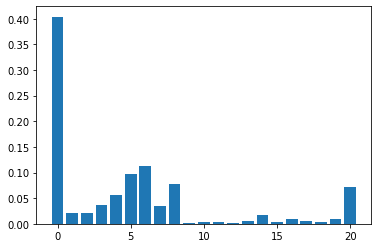

In [6]:
model = RandomForestClassifier(n_estimators=20, max_depth=10)
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])
importance = model.feature_importances_

for i,v in enumerate(importance):
    print(X_train.columns[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Scoring Model

In [7]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.7916487801387995


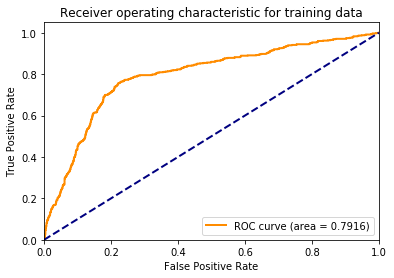

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()